Categories of problems
1. time lag
    +6 min
    -6 min
    larger than 6 min
    smaller than -6 min
2. Vertical offset after time correction of 10 or more points
    +1 cm
    -1 cm
    +5 mm
    -5 mm
3. repeated points
    doccument how many?
4. NOAA gap fill
    any gap that NOAA has filled 30+ min

In [313]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [314]:
p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
p21_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)
p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
p21_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)
p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')
p21_1323_LH.drop(labels=range(len(p21_1323_LH)-6,len(p21_1323_LH)), axis=0, inplace=True)


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_31446/2121313406.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_31446/2121313406.py:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_31446/2121313406.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')


In [315]:
directory_path = '/Users/rprocious/Downloads/data/NOAA/pier21/'

dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

p21_NOAA = pd.concat(dataframes, ignore_index=True)

In [316]:
frames = [p21_9300_LH,p21_0112_LH,p21_1323_LH]
p21_LH = pd.concat(frames, ignore_index=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1993 0000,1.491,1.733,1.453
1,01-01-1993 0006,1.491,NaN,1.456
2,01-01-1993 0012,1.496,NaN,1.458
3,01-01-1993 0018,1.503,NaN,1.461
4,01-01-1993 0024,1.512,NaN,1.464


In [317]:
p21_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
p21_NOAA.reset_index(drop = True, inplace=True)

In [318]:
p21_LH.drop(labels=range(0,262800),axis=0, inplace=True)
p21_LH.reset_index(drop=True, inplace=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1996 0000,1.634,1.911,1.550
1,01-01-1996 0006,1.648,NaN,1.549
2,01-01-1996 0012,1.657,NaN,1.547
3,01-01-1996 0018,1.664,NaN,1.546
4,01-01-1996 0024,1.654,NaN,1.545


In [319]:
comparison_df = pd.DataFrame()
comparison_df['Dates'] = p21_LH['#date+time']
comparison_df['Lighthouse WL'] = p21_LH['022-pwl']
comparison_df['NOAA WL'] = p21_NOAA[' Water Level']
comparison_df.head(10)

,Dates,Lighthouse WL,NOAA WL
0,01-01-1996 0000,1.634,1.634
1,01-01-1996 0006,1.648,1.648
2,01-01-1996 0012,1.657,1.657
3,01-01-1996 0018,1.664,1.664
4,01-01-1996 0024,1.654,1.654
5,01-01-1996 0030,1.647,1.647
6,01-01-1996 0036,1.66,1.660
7,01-01-1996 0042,1.655,1.655
8,01-01-1996 0048,1.652,1.652
9,01-01-1996 0054,1.627,1.627


In [320]:
comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()

,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,1.547,1.548
2454476,2023-12-31 23:36:00,1.548,1.542
2454477,2023-12-31 23:42:00,1.542,1.553
2454478,2023-12-31 23:48:00,1.553,1.579
2454479,2023-12-31 23:54:00,1.579,1.580


(1.0, 2.0)

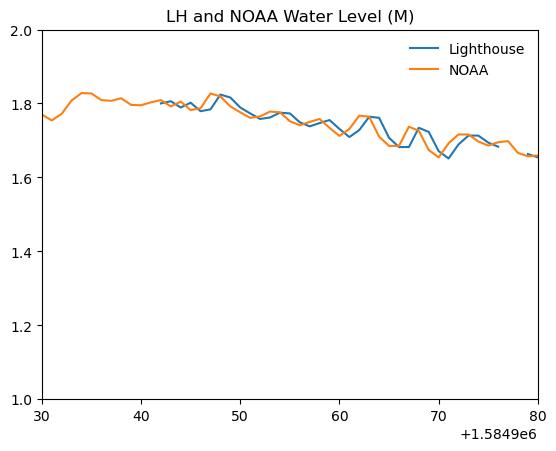

In [321]:
plt.plot(comparison_df['Lighthouse WL'], label = 'Lighthouse')

plt.plot(comparison_df['NOAA WL'], label = 'NOAA')
plt.title('LH and NOAA Water Level (M)')
plt.legend(frameon= False)
plt.xlim(1584930,1584980)
plt.ylim(1,2)

In [322]:
for i in range(len(comparison_df)):
    if comparison_df.loc[i]['Lighthouse WL'] != comparison_df.loc[i]['NOAA WL']:
        print(comparison_df.loc[i]['Dates'])
        break


1996-04-23 00:54:00


In [323]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


In [324]:
comparison_df[1584937:1584947]

,Dates,Lighthouse WL,NOAA WL
1584937,2014-01-29 21:42:00,NaN,1.807
1584938,2014-01-29 21:48:00,NaN,1.814
1584939,2014-01-29 21:54:00,NaN,1.796
1584940,2014-01-29 22:00:00,NaN,1.795
1584941,2014-01-29 22:06:00,NaN,1.803
1584942,2014-01-29 22:12:00,1.800,1.809
1584943,2014-01-29 22:18:00,1.806,1.792
1584944,2014-01-29 22:24:00,1.789,1.805
1584945,2014-01-29 22:30:00,1.802,1.782
1584946,2014-01-29 22:36:00,1.779,1.787


Data coming back in from lighthouse looks to be off by 6 min and 0.003M offset

In [325]:
revised_LH = pd.DataFrame()
revised_LH['Adjusted LH WL'] = comparison_df['Lighthouse WL']
revised_LH.drop(1584941,axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted LH WL'] = revised_LH['Adjusted LH WL']
comparison_df[1584937:1584947]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
1584937,2014-01-29 21:42:00,NaN,1.807,NaN
1584938,2014-01-29 21:48:00,NaN,1.814,NaN
1584939,2014-01-29 21:54:00,NaN,1.796,NaN
1584940,2014-01-29 22:00:00,NaN,1.795,NaN
1584941,2014-01-29 22:06:00,NaN,1.803,1.800
1584942,2014-01-29 22:12:00,1.800,1.809,1.806
1584943,2014-01-29 22:18:00,1.806,1.792,1.789
1584944,2014-01-29 22:24:00,1.789,1.805,1.802
1584945,2014-01-29 22:30:00,1.802,1.782,1.779
1584946,2014-01-29 22:36:00,1.779,1.787,1.784


(1.0, 2.0)

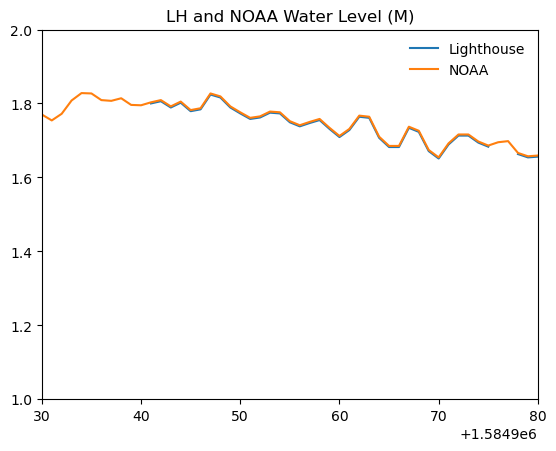

In [326]:
plt.plot(comparison_df['Shifted LH WL'], label = 'Lighthouse')

plt.plot(comparison_df['NOAA WL'], label = 'NOAA')
plt.title('LH and NOAA Water Level (M)')
plt.legend(frameon= False)
plt.xlim(1584930,1584980)
plt.ylim(1,2)

In [327]:
differences = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']
non_zero_differences = differences != 0

filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)

cleaned_remaining_differences

,Difference,Date
0,0.109,1996-04-23 00:54:00
1,0.254,1996-04-23 01:00:00
2,0.257,1996-04-23 01:06:00
3,0.050,1996-04-29 10:00:00
4,-2.054,1996-06-17 15:00:00
...,...,...
412228,0.001,2023-12-01 21:06:00
412229,-0.003,2023-12-01 21:12:00
412230,-0.009,2023-12-01 21:18:00
412231,-0.004,2023-12-01 21:24:00


In [328]:
# Create a boolean mask where the condition is True
mask = comparison_df['Shifted LH WL'] == comparison_df['Shifted LH WL'].shift(-1)

# Use the mask to filter the DataFrame and get the double values and dates
double_values = comparison_df.loc[mask, 'Shifted LH WL'].to_frame()
double_dates = comparison_df.loc[mask, 'Dates'].to_frame()

In [329]:
len(double_values)

95334

In [330]:
double_dates

,Dates
20,1996-01-01 02:00:00
31,1996-01-01 03:06:00
41,1996-01-01 04:06:00
49,1996-01-01 04:54:00
50,1996-01-01 05:00:00
...,...
2454324,2023-12-31 08:24:00
2454341,2023-12-31 10:06:00
2454348,2023-12-31 10:48:00
2454397,2023-12-31 15:42:00


In [331]:
comparison_df[19:32]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
19,1996-01-01 01:54:00,1.658,1.658,1.658
20,1996-01-01 02:00:00,1.644,1.644,1.644
21,1996-01-01 02:06:00,1.644,1.644,1.644
22,1996-01-01 02:12:00,1.648,1.648,1.648
23,1996-01-01 02:18:00,1.670,1.670,1.670
24,1996-01-01 02:24:00,1.680,1.680,1.680
25,1996-01-01 02:30:00,1.685,1.685,1.685
26,1996-01-01 02:36:00,1.688,1.688,1.688
27,1996-01-01 02:42:00,1.676,1.676,1.676
28,1996-01-01 02:48:00,1.687,1.687,1.687


In [332]:

mask = cleaned_remaining_differences['Difference'].rolling(window=10, min_periods=10).apply(lambda x: pd.Series(x).nunique() == 1).shift(-9)

# Filter the DataFrame based on the mask
repeating_df = cleaned_remaining_differences.loc[mask == 1, ['Difference', 'Date']]

# Reset the index for clarity
repeating_df.reset_index(drop=True, inplace=True)

repeating_df

,Difference,Date
0,-0.002,2001-12-10 14:00:00
1,-0.002,2001-12-10 14:06:00
2,-0.002,2001-12-10 14:12:00
3,-0.002,2001-12-10 14:18:00
4,-0.002,2001-12-10 14:24:00
...,...,...
129989,-0.001,2023-06-14 09:06:00
129990,-0.001,2023-06-16 07:00:00
129991,-0.001,2023-06-18 14:30:00
129992,-0.001,2023-06-18 17:06:00


In [333]:
for i in range(len(repeating_df)):
    if abs(repeating_df.loc[i]['Difference']) <= 0.005:
        repeating_df.drop(labels=(i),axis=0,inplace=True)
repeating_df.reset_index(drop=True, inplace=True)
repeating_df.to_clipboard()

In [334]:
end_offset_dates = []
offset_dates = pd.DataFrame()
for i in range(len(repeating_df)-1):

    if repeating_df.loc[i]['Difference'] != repeating_df.loc[i+1]['Difference']:
        end_offset_dates.append(repeating_df.loc[i+1]['Date'])

offset_dates['Dates'] = end_offset_dates
offset_dates['Dates'] = pd.to_datetime(offset_dates['Dates'])
offset_dates

,Dates
0,2011-10-13 11:24:00
1,2020-11-16 12:12:00
2,2020-11-29 00:12:00
3,2020-11-29 12:12:00
4,2021-03-23 00:24:00
...,...
64,2023-04-14 04:48:00
65,2023-04-28 16:48:00
66,2023-05-09 00:54:00
67,2023-05-22 05:42:00


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


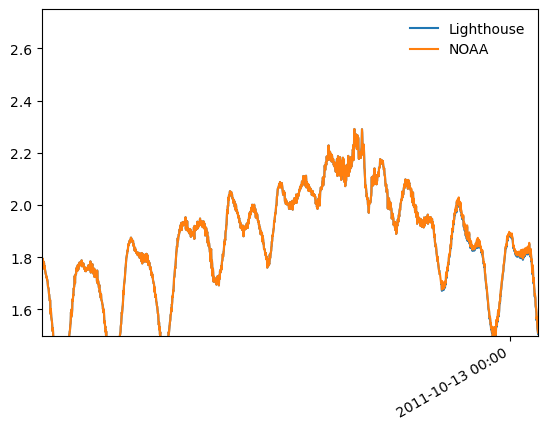

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


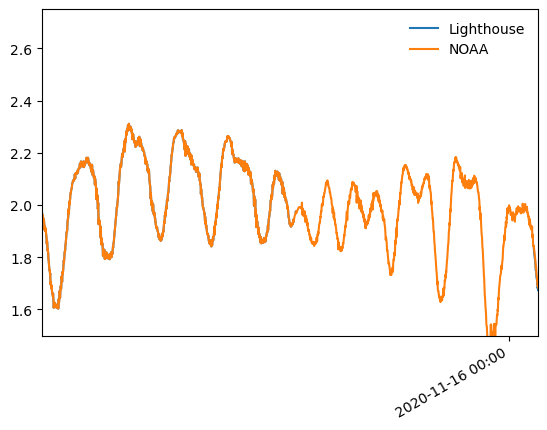

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


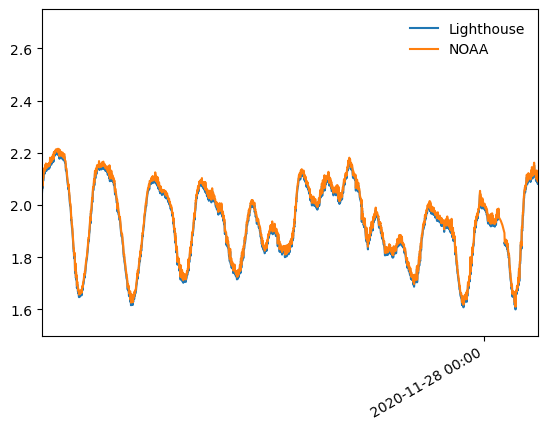

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


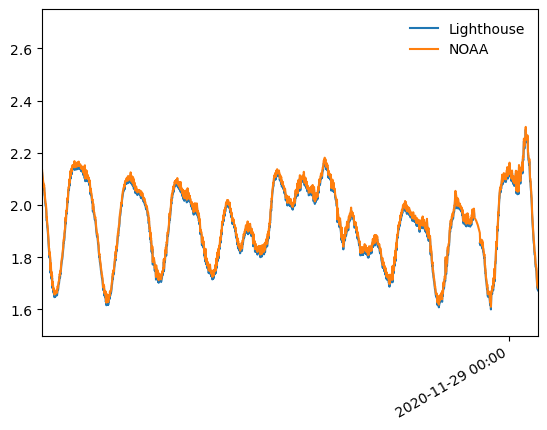

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


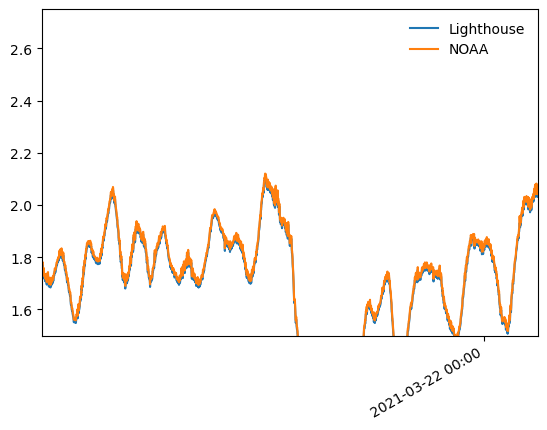

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


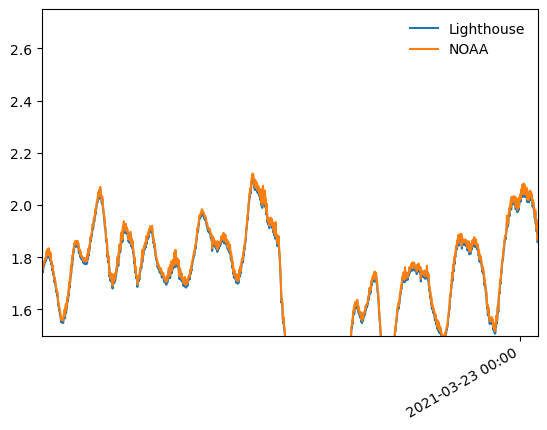

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


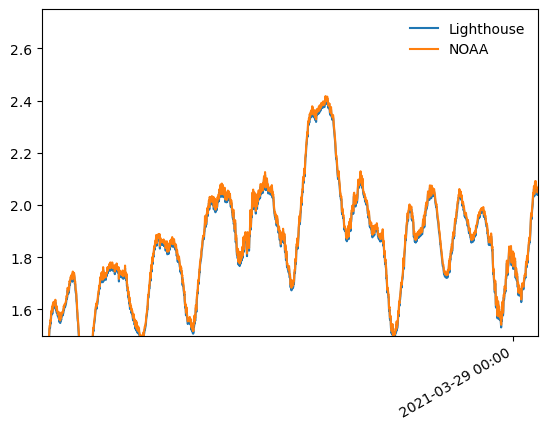

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


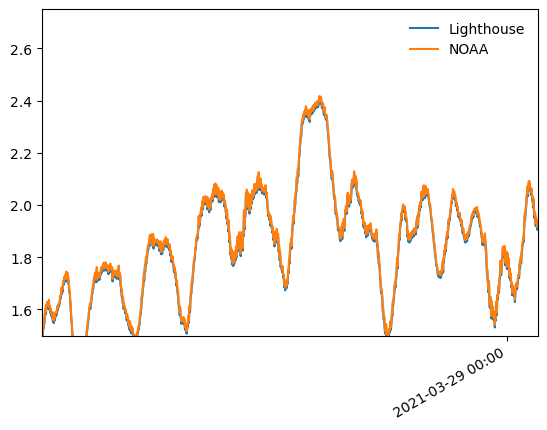

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


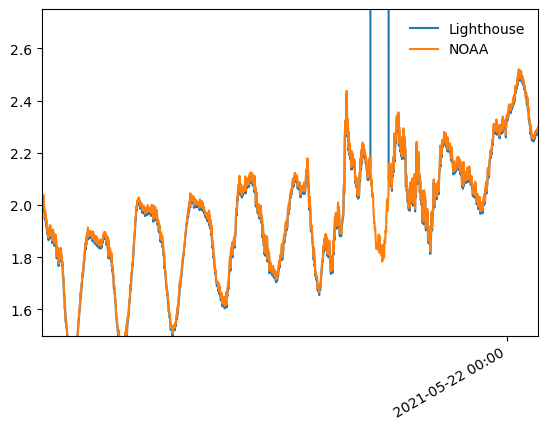

In [337]:
for i in range(len(end_offset_dates)-60):
    plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

    plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

    plt.gcf().autofmt_xdate()

    plt.ylim(1.5,2.75)

    start_date = pd.to_datetime(offset_dates.loc[i]['Dates']-pd.DateOffset(days=10))

    end_date = pd.to_datetime(offset_dates.loc[i]['Dates']+pd.DateOffset(hours=2))

    plt.xlim(start_date, end_date)
    plt.legend(frameon = False)
    plt.show()